In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [5]:
# 当有本地csv数据时，使用以下方法获取数据
def csvLoader(csvpath):
    csv_data = pd.read_csv(csvpath,header=0)
    #print(csv_data)
    # 转换为numpy矩阵
    return np.array(csv_data)

PCA_projected_trainData = csvLoader('PCAProjectedTrainData800.csv')
PCA_projected_testData = csvLoader('PCAProjectedTestData800.csv')
#print(PCA_projected_trainData)

[[-1.12587939e+00 -1.28394947e-01 -1.02922805e-01 ... -1.07955584e+00
   1.07551099e+00  4.22669750e-15]
 [-1.30842129e+00  1.93540142e-01 -4.05118163e-01 ... -1.56165773e+00
  -9.93397936e-01  4.22669750e-15]
 [-1.40499448e+00  9.78719965e-02 -3.45343680e-01 ... -5.10762097e-01
  -1.66803272e+00  4.22669750e-15]
 ...
 [ 4.85000369e+00 -4.85771050e+00  3.79229550e+00 ...  1.03772523e-01
  -2.01921434e-01  4.22669750e-15]
 [-1.22662864e+00  2.81809936e-01 -4.41758707e-01 ...  1.02968771e+00
  -1.02025218e-01  4.22669750e-15]
 [-1.41125238e+00  3.94713582e-01 -2.02570439e-01 ...  1.17276673e+00
   1.51261029e-01  4.22669750e-15]]


In [18]:
train_labels=[]
for c in getListFromFile('dorothea_train.labels'):
    if c!= '1':
        train_labels.append('0')
    else:train_labels.append(c)
train_labels=np.asarray(train_labels)
print(train_labels)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0

In [14]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import roc_curve, roc_auc_score, recall_score
#Read the input files and read every line
def loadData(trainingFile, testingFile):
    
    def convertDataframe(inputFile):
        data = pd.DataFrame(columns=range(100000))
        
        for i in range(len(inputFile)):
            record = np.fromstring(inputFile[i], dtype=int, sep=' ')
            record_bool = [0 for j in range(100000)]
            for col in record:
                record_bool[col-1] = 1
            
            data.loc[i] = record_bool
            
        return data
    
    with open(trainingFile, "r") as fr1:
        trainFile = fr1.readlines()
    
    #Split each line in the two files into label and data  
    train_data_list = []
    train_labels_list = []
    
    for inputData in trainFile:
        train_labels_list.append(inputData[0])
        #Remove the activity label (0/1) and new line character from each record
        inputData = inputData.replace("0\t", "")
        inputData = inputData.replace("1\t", "")
        inputData = inputData.replace("\n", "")
        train_data_list.append(inputData)
    
    train_labels = np.asarray(train_labels_list)
    train_data = convertDataframe(train_data_list)
        
    with open(testingFile, "r") as fr2:
        testFile = fr2.readlines()
    
    test_data = convertDataframe(testFile)
            
    return train_data, test_data, train_labels

# Project data on a reduced dimensionality k using PCA
def pca(train_data, test_data, k=500):

    pca = sklearnPCA(n_components = k)
    PCA_projected_trainData = pca.fit_transform(train_data)
    PCA_projected_testData = pca.transform(test_data)
    
    return PCA_projected_trainData, PCA_projected_testData

# Save data handled by PCA
def pcaData2csv(csvpath1,csvpath2, train_data,test_data):
    dftrain=pd.DataFrame(train_data)
    dftest=pd.DataFrame(test_data)
    dftrain.to_csv(csvpath1,index=False,sep=',')
    dftest.to_csv(csvpath2,index=False,sep=',')
    if os.path.exists(csvpath1):
        print("PCA projected train data has been written into csv files in:"+str(csvpath1))
        if os.path.exists(csvpath2):
            print("PCA projected test data has been written into csv files in:"+str(csvpath2))
        else:
            raise Warning("File written failed in:"+str(csvpath2))
    else:raise Warning("File written failed in:"+str(csvpath1))
    # 抛出dataframe类型以备其他用途
    return dftrain,dftest

# PCA

主成分分析（Principal Components Analysis），简称PCA，是一种数据降维技术，用于数据预处理。

PCA的一般步骤是：先对原始数据零均值化，然后求协方差矩阵，接着对协方差矩阵求特征向量和特征值，这些特征向量组成了新的特征空间。

sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)

## 参数：

n_components:  

意义：PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n

类型：int 或者 string，缺省时默认为None，所有成分被保留。

          赋值为int，比如n_components=1，将把原始数据降到一个维度。

          赋值为string，比如n_components='mle'，将自动选取特征个数n，使得满足所要求的方差百分比。

copy:

类型：bool，True或者False，缺省时默认为True。
意义：表示是否在运行算法时，将原始训练数据复制一份。若为True，则运行PCA算法后，原始训练数据的值不            会有任何改变，因为是在原始数据的副本上进行运算；若为False，则运行PCA算法后，原始训练数据的              值会改，因为是在原始数据上进行降维计算。

whiten:

类型：bool，缺省时默认为False

意义：白化，使得每个特征具有相同的方差。

In [6]:
#Read the training and the test data set and get 3 separate dataframes of training reviews, test reviews and training labels
train_data, test_data, train_labels = loadData('train.dat', 'test.dat')

In [221]:
#Reduce the number of dimensions from 100000 to 500 using PCA
PCA_projected_trainData, PCA_projected_testData = pca(train_data, test_data, 800)


In [222]:
csv_path1=r"PCAProjectedTrainData800.csv"
csv_path2=r"PCAProjectedTestData800.csv"
pcaData2csv(csv_path1,csv_path2, PCA_projected_trainData,PCA_projected_testData)

PCA projected train data has been written into csv files in:PCAProjectedTrainData800.csv
PCA projected test data has been written into csv files in:PCAProjectedTestData800.csv


(          0         1         2         3         4         5         6    \
 0   -1.125879 -0.128395 -0.102923 -0.313411  0.160987  0.130299  0.063675   
 1   -1.308421  0.193540 -0.405118 -0.140494 -0.031587  0.171552 -0.039403   
 2   -1.404994  0.097872 -0.345344 -0.158859  0.093332  0.388095  0.126652   
 3   -1.361430  0.190956 -0.230127 -0.239852 -0.099705  0.563770 -0.133497   
 4   -1.092508  0.367352 -0.308897 -0.146139  0.008681  0.363045  0.103659   
 ..        ...       ...       ...       ...       ...       ...       ...   
 795 -1.338668  0.192657 -0.293322 -0.211951  0.117938  0.274550  0.059335   
 796 -1.295912  0.028073 -0.169278 -0.241292 -0.034312  0.233793 -0.211511   
 797  4.850004 -4.857711  3.792295 -0.416099  0.330068  1.029004 -1.062087   
 798 -1.226629  0.281810 -0.441759 -0.202731  0.130665  0.233283  0.080688   
 799 -1.411252  0.394714 -0.202570 -0.235522 -0.020797  0.280551  0.390161   
 
           7         8         9    ...       790       791   

## 伯努利朴素贝叶斯BernoulliNB

多项式朴素贝叶斯可同时处理二项分布（抛硬币）和多项分布（掷骰子），其中二项分布又叫做伯努利分布，它是一种现实中常见，并且拥有很多优越数学性质的分布。因此，既然有着多项式朴素贝叶斯，我们自然也就又专门用来处理二项分布的朴素贝叶斯：伯努利朴素贝叶斯。

伯努利贝叶斯类BernoulliN假设数据服从多元伯努利分布，并在此基础上应用朴素贝叶斯的训练和分类过程。多元伯努利分布简单来说，就是数据集中可以存在多个特征，但每个特征都是二分类的，可以以布尔变量表示，也可以表示为{0，1}或者{-1，1}等任意二分类组合。因此，这个类要求将样本转换为二分类特征向量，如果数据本身不是二分类的，那可以使用类中专门用来二值化的参数binarize来改变数据。

伯努利朴素贝叶斯与多项式朴素贝叶斯非常相似，都常用于处理文本分类数据。但由于伯努利朴素贝叶斯是处理二项分布，所以它更加在意的是“存在与否”，而不是“出现多少次”这样的次数或频率，这是伯努利贝叶斯与多项式贝叶斯的根本性不同。

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, average_precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
def resultAnalysis(testData,testLabels,pred,proba,_module=None):
    xmodulelist = ['macro','micro','weighted','non-avg']
    criteion = ['Accuracy','Precision','Recall','F1_score','AUC','AUPRC']
    df = pd.DataFrame(index=xmodulelist,columns=criteion)
    
    
    if _module not in xmodulelist:
        
        df['Accuracy']['non-avg']=round(accuracy_score(testLabels,pred),3)
        df['Precision']['non-avg']=round(precision_score(testLabels,pred,),3)
        df['Recall']['non-avg']=round(recall_score(testLabels,pred,),3)
        df['AUC']['non-avg']=round(roc_auc_score(testLabels,proba,),3)
        df['AUPRC']['non-avg']=round(average_precision_score(testLabels,pred,),3)
        df['F1_score']['non-avg']=round(f1_score(testLabels,pred,),3)
        print(df.iloc[3,:])
            
    else:
        df['Accuracy'][_module]=round(accuracy_score(testLabels,pred),3)
        df['Precision'][_module]=round(precision_score(testLabels,pred,average=_module),3)
        df['Recall'][_module]=round(recall_score(testLabels,pred,average=_module),3)
        df['AUC'][_module]=round(roc_auc_score(testLabels,proba,average=_module),3)
        df['AUPRC'][_module]=round(average_precision_score(testLabels,pred,average=_module),3)
        df['F1_score'][_module]=round(f1_score(testLabels,pred,average=_module),3)
        print(df.loc[_module,:])
    print(confusion_matrix(testLabels,pred))
    return classification_report(testLabels,pred)

In [7]:
#with open(trainingFile, "r") as fr1:
#    trainFile = fr1.readlines()
def getListFromFile(_filename):
    _list = []
    with open(_filename, "r") as fr3:
        dat_r = fr3.readlines()
    for inputData in dat_r:
        _list.append(inputData[0])
    target = np.asarray(_list)
    return target

test_labels = getListFromFile('valid_labels.dat')

In [223]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import auc

def BNBC2(trainData,trainLabels, testData,testLabels):
    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)#二值化
    
    clf = BernoulliNB (alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
    clf.fit(trainData,trainLabels)
    
    pred = clf.predict(testData)
    proba = clf.predict_proba(testData)[:,1]
    score = clf.score(testData,testLabels)
    fpr, tpr, thresholds = roc_curve(testLabels, proba)
    rocauc=auc(fpr, tpr)
    print(resultAnalysis(testData,testLabels,pred,proba,))
    #print(proba)
    print("\tAccuracy:{:.3f}".format(score))
    print("\tPrecision:{:.3f}".format(precision_score(testLabels,pred)))
    print("\tRecall:{:.3f}".format(recall_score(testLabels,pred)))
    print("\tF1_score:{:.3f}".format(f1_score(testLabels,pred)))
    print("\tAUC:{:.3f}".format(roc_auc_score(testLabels,proba)))
    return pred

BNBC2(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels)

Accuracy     0.929
Precision    0.645
Recall       0.588
F1_score     0.615
AUC          0.882
AUPRC         0.42
Name: non-avg, dtype: object
[[305  11]
 [ 14  20]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       316
           1       0.65      0.59      0.62        34

    accuracy                           0.93       350
   macro avg       0.80      0.78      0.79       350
weighted avg       0.93      0.93      0.93       350

	Accuracy:0.929
	Precision:0.645
	Recall:0.588
	F1_score:0.615
	AUC:0.882


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [172]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
 
def min_max_normalization(np_array):
    min_max_scaler = MinMaxScaler(feature_range=[0,10])
    ret = min_max_scaler.fit_transform(np_array)
    return ret

def CNB(trainData,trainLabels, testData,testLabels):

    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)#二值化
    
    trainData=min_max_normalization(trainData)
    testData=min_max_normalization(testData)
    
    clf = ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)
    clf.fit(trainData,trainLabels)

    pred = clf.predict(testData)
    proba = clf.predict_proba(testData)[:,1]
    score = clf.score(testData,testLabels)
    fpr, tpr, thresholds = roc_curve(testLabels, proba)
    #rocauc=auc(fpr, tpr)
    print(resultAnalysis(testData,testLabels,pred,proba,))
    # 以下针对少数类
    print("\tAccuracy:{:.3f}".format(score))
    print("\tPrecision:{:.3f}".format(precision_score(testLabels,pred)))
    print("\tRecall:{:.3f}".format(recall_score(testLabels,pred)))
    print("\tAUC:{:.3f}".format(roc_auc_score(testLabels,proba)))
    return pred

CNB(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels)

Accuracy     0.886
Precision    0.442
Recall       0.676
F1_score     0.535
AUC           0.81
AUPRC        0.331
Name: non-avg, dtype: object
[[287  29]
 [ 11  23]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       316
           1       0.44      0.68      0.53        34

    accuracy                           0.89       350
   macro avg       0.70      0.79      0.73       350
weighted avg       0.91      0.89      0.90       350

	Accuracy:0.886
	Precision:0.442
	Recall:0.676
	AUC:0.810


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [185]:
from sklearn.neighbors import KNeighborsClassifier

def KNNC(trainData,trainLabels, testData,testLabels,k):
    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)#二值化
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    
    knn.fit(trainData,trainLabels)
    
    pred = knn.predict(testData)
    proba = knn.predict_proba(testData)[:,1]
    print(proba)
    score = knn.score(testData,testLabels)
    fpr, tpr, thresholds = roc_curve(testLabels, proba)
    rocauc=auc(fpr, tpr)
    print(resultAnalysis(testData,testLabels,pred,proba,))
    return pred

KNNC(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels,3)
# KNN不适合不平衡数据集

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [187]:
def accuracy(preds, labels):
    #num = min(len(_preds),len(_labels))
    #print(num)
    labels=labels.astype(int)
    preds=preds.astype(int)
    num=len(preds)
    #print(preds)
    correct = 0
    print(preds[:10])
    print(labels[:10])
    tp = 0 #true_positives
    tn = 0 #true_negatives
    fp = 0 #false_positives
    fn = 0 #false_negatives
    for i in range(num):
        if preds[i]==labels[i]:
            correct+=1
            if preds[i]:
                tp+=1
            else:tn+=1
        else:
            if preds[i]:
                fp+=1
            else:fn+=1
    print("预测总数:%s" % len(preds))
    print("标签数:%s" % len(labels))
    print("正确数:%s" % correct)
    print("TP:FP",(tp,fp))
    print("TN:FN",(tn,fn))
    print("Recall",recall_score(labels.astype(int),preds.astype(int),pos_label=1))
    _acc = correct/len(labels)
    _prec = tp/(tp+fp)
    _recall = tp/(tp+fn)
    _fpr = fp/(fp+tn)
    _tnr = tn/(fp+tn)
    _f1 = 2*_prec*_recall/(_prec+_recall)
    return({'ACC':_acc,'Precision':_prec,'Recall':_recall,'FPR':_fpr,'TNR':_tnr,'F1':_f1})
        

### Accuracy：准确率

也就是所有预测正确的和所有test集的比例。

准确率=预测正确的样本数/所有样本数，即预测正确的样本比例（包括预测正确的正样本和预测正确的负样本）。

>Accuracy = T/(T+F)

### Precision：查准率

>Precision=TP/(TP+FP)

用于衡量模型对某一类的预测有多准。

### Recall：召回率（真正类率）

>Recall = TP/(TP+FN)

指的是某个类别的Recall。Recall表示某一类样本，预测正确的与所有Ground Truth的比例。

### FPR

>FPR = FP/(TN+FP)

代表分类器预测的正类中实际负实例占所有负实例的比例。
>FPR = 1 - TNR

### TNR

>TNR = TN/(TN+FP)

In [20]:
#SVM

from sklearn import svm
#from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score
#from imblearn import specificity_score

def SVMC_kernel(trainData,trainLabels, testData,testLabels, weights='balanced'):
    #clf = svm.SVC(gamma='scale', class_weight=weights)
    #clf.fit(trainData,trainLabels)
    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)#二值化
    for k in ['linear','rbf','poly','sigmoid']:
        clf_proba = svm.SVC(kernel=k,C=1.0,probability=True).fit(trainData,trainLabels)
        #print(clf_proba.decision_function(testData).shape)
        #predictions = clf.predict(testData)
        clf_pred = clf_proba.predict(testData)
        result = clf_proba.score(testData, testLabels)
        score = clf_proba.decision_function(testData)

        rocauc = roc_auc_score(testLabels, score)
        recall = recall_score(testLabels, clf_pred)
        precision = precision_score(testLabels, clf_pred)
        print("The kernel {} prediction is:".format(k))
        print(resultAnalysis(testData,testLabels,clf_pred,score,))
    #print("\tAccuracy:{:.3f}".format(result))
    #print("\tPrecision:{:.3f}".format(precision))
    #print("\tRecall:{:.3f}".format(recall))
    #print("\tSpecificity:{:.3f}".format(specificity_score(testLabels, clf_pred)))
    #print("\tAUC:{:.3f}".format(rocauc))
    #return clf_pred

SVMC_kernel(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels)

The kernel linear prediction is:
Accuracy     0.931
Precision    0.917
Recall       0.324
F1_score     0.478
AUC          0.917
AUPRC        0.362
Name: non-avg, dtype: object
[[315   1]
 [ 23  11]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       316
           1       0.92      0.32      0.48        34

    accuracy                           0.93       350
   macro avg       0.92      0.66      0.72       350
weighted avg       0.93      0.93      0.92       350



D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Preci

The kernel rbf prediction is:
Accuracy     0.903
Precision      0.0
Recall         0.0
F1_score       0.0
AUC          0.925
AUPRC        0.097
Name: non-avg, dtype: object
[[316   0]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       316
           1       0.00      0.00      0.00        34

    accuracy                           0.90       350
   macro avg       0.45      0.50      0.47       350
weighted avg       0.82      0.90      0.86       350



D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Preci

The kernel poly prediction is:
Accuracy     0.903
Precision      0.0
Recall         0.0
F1_score       0.0
AUC          0.926
AUPRC        0.097
Name: non-avg, dtype: object
[[316   0]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       316
           1       0.00      0.00      0.00        34

    accuracy                           0.90       350
   macro avg       0.45      0.50      0.47       350
weighted avg       0.82      0.90      0.86       350

The kernel sigmoid prediction is:
Accuracy     0.923
Precision    0.889
Recall       0.235
F1_score     0.372
AUC          0.925
AUPRC        0.283
Name: non-avg, dtype: object
[[315   1]
 [ 26   8]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       316
           1       0.89      0.24      0.37        34

    accuracy                           0.92       350
   macro avg       0.91      0.62      0.67       350
weig

In [224]:
def SVMC(trainData,trainLabels, testData,testLabels,weights='balanced'):
    
    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)#二值化
    
    clf_proba = svm.SVC(gamma='scale', class_weight=weights).fit(trainData,trainLabels)
    #print(clf_proba.decision_function(testData).shape)
    #predictions = clf.predict(testData)
    
    clf_pred = clf_proba.predict(testData)
    
    result = clf_proba.score(testData, testLabels)
    score = clf_proba.decision_function(testData)
    
    rocauc = roc_auc_score(testLabels, score)
    recall = recall_score(testLabels, clf_pred)
    precision = precision_score(testLabels, clf_pred)
    
    print(resultAnalysis(testData,testLabels,clf_pred,score,))
    #print("\tAccuracy:{:.3f}".format(result))
    #print("\tPrecision:{:.3f}".format(precision))
    #print("\tRecall:{:.3f}".format(recall))
    #print("\tSpecificity:{:.3f}".format(specificity_score(testLabels, clf_pred)))
    #print("\tAUC:{:.3f}".format(rocauc))
    return clf_pred
SVMC(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels)

Accuracy     0.914
Precision      1.0
Recall       0.118
F1_score     0.211
AUC           0.92
AUPRC        0.203
Name: non-avg, dtype: object
[[316   0]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       316
           1       1.00      0.12      0.21        34

    accuracy                           0.91       350
   macro avg       0.96      0.56      0.58       350
weighted avg       0.92      0.91      0.88       350



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
#朴素贝叶斯分类器
bnbc_preds = getListFromFile('output-k-100-PCA-BNBC.dat')
accuracy(bnbc_preds,test_labels)

[0 0 1 0 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0]
预测总数:350
标签数:350
正确数:329
TP:FP (20, 7)
TN:FN (309, 14)
Recall 0.5882352941176471


{'ACC': 0.94,
 'Precision': 0.7407407407407407,
 'Recall': 0.5882352941176471,
 'FPR': 0.022151898734177215,
 'TNR': 0.9778481012658228,
 'F1': 0.6557377049180328}

In [101]:
#SVM

svm_preds = getListFromFile('output-k-100-PCA-SVM.dat')
accuracy(svm_preds,test_labels)

[0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
预测总数:350
标签数:350
正确数:325
TP:FP (10, 1)
TN:FN (315, 24)
Recall 0.29411764705882354


{'ACC': 0.9285714285714286,
 'Precision': 0.9090909090909091,
 'Recall': 0.29411764705882354,
 'FPR': 0.0031645569620253164,
 'TNR': 0.9968354430379747,
 'F1': 0.4444444444444445}

In [188]:
# Random Forest
#test_labels = getListFromFile('valid_labels.dat')
rfc_preds = getListFromFile('output-k-100-PCA-RFC.dat')
accuracy(rfc_preds, test_labels)

[0 0 1 0 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0]
预测总数:350
标签数:350
正确数:329
TP:FP (18, 5)
TN:FN (311, 16)
Recall 0.5294117647058824


{'ACC': 0.94,
 'Precision': 0.782608695652174,
 'Recall': 0.5294117647058824,
 'FPR': 0.015822784810126583,
 'TNR': 0.9841772151898734,
 'F1': 0.631578947368421}

Accuracy     0.926
Precision      0.9
Recall       0.265
F1_score     0.409
AUC          0.915
AUPRC         0.31
Name: non-avg, dtype: object
[[315   1]
 [ 25   9]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       316
           1       0.90      0.26      0.41        34

    accuracy                           0.93       350
   macro avg       0.91      0.63      0.68       350
weighted avg       0.92      0.93      0.91       350



In [68]:
#svm_preds = SVMC(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels)
getPredictionFile('output-k-100-PCA-SVM.dat',svm_preds)

output-k-100-PCA-SVM.dat written completed.


In [111]:
#from sklearn.metrics import roc_curve,precision_recall_curve,roc_auc_score,average_precision_score,f1_score
#test_labels = getListFromFile('valid_labels.dat')
weights = {'1':34,'0':316}

svm_preds2=SVMC2(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels,weights=weights)
#svm_f1 = f1_score(list(map(int,test_labels)),svm_score)
#print('F1:',svm_f1)

#svm_preds = getListFromFile('output-k-100-PCA-SVM.dat')
accuracy(svm_preds2,test_labels)


Accuracy     0.929
Precision    0.909
Recall       0.294
F1_score     0.444
AUC          0.927
AUPRC        0.336
Name: non-avg, dtype: object
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       316
           1       0.91      0.29      0.44        34

    accuracy                           0.93       350
   macro avg       0.92      0.65      0.70       350
weighted avg       0.93      0.93      0.91       350

[0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
预测总数:350
标签数:350
正确数:325
TP:FP (10, 1)
TN:FN (315, 24)
Recall 0.29411764705882354


{'ACC': 0.9285714285714286,
 'Precision': 0.9090909090909091,
 'Recall': 0.29411764705882354,
 'FPR': 0.0031645569620253164,
 'TNR': 0.9968354430379747,
 'F1': 0.4444444444444445}

In [72]:
PCA_Data = np.vstack((PCA_projected_trainData,PCA_projected_testData))
all_labels = np.hstack((train_labels,test_labels))


In [234]:
from sklearn.ensemble import RandomForestClassifier     #随机森林

def RFC(trainData,trainLabels, testData,testLabels):
    
    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)#二值化
    
    rfc = RandomForestClassifier(n_estimators=63, max_depth=20,max_features=26,min_samples_leaf=3,min_samples_split=14,criterion='entropy',
                                 class_weight='balanced',random_state=42)                      #不调参
    rfc = rfc.fit(trainData, trainLabels)                 #用训练集数据训练模型
    pred = rfc.predict(testData)
    result = rfc.score(testData, testLabels)
    proba = rfc.predict_proba(testData)[:,1]
    rocauc = roc_auc_score(testLabels, proba)
    recall = recall_score(testLabels, pred)
    precision = precision_score(testLabels, pred)
    print(resultAnalysis(testData,testLabels,pred,proba,))
    
    return pred
RFC(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels)

Accuracy     0.949
Precision    0.735
Recall       0.735
F1_score     0.735
AUC          0.925
AUPRC        0.566
Name: non-avg, dtype: object
[[307   9]
 [  9  25]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       316
           1       0.74      0.74      0.74        34

    accuracy                           0.95       350
   macro avg       0.85      0.85      0.85       350
weighted avg       0.95      0.95      0.95       350



array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [122]:
import matplotlib.pyplot as plt

def getROCFig(testLabels,score):
    fpr,tpr,thresholds = roc_curve(testLabels,score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % rocauc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

xgboost可以通过使用一些特定参数来实现随机森林算法中的bagging（bootstrap aggregating）方法，在集成几个弱分类器的同时，构建一个更强的分类器。具体实现方法是在构建每个树的时候随机选择一部分特征进行分裂。

针对xgboost中的不平衡分类问题，可以通过以下参数进行调参：

* scale_pos_weight: 用于调整正负样本的权重，通常情况下，正负样本数目差异比较大时需要设置该参数，将其设置为负样本数/正样本数，以达到平衡正负样本的权重。
* subsample 和 colsample_bytree: 这两个参数可以控制树的生长和特征选择的随机性，通过调节这两个参数可以缓解过拟合的问题，从而提高模型的分类能力和泛化性能。
* max_depth 和 min_child_weight: 这两个参数可以控制树的复杂度和节点的最小权重，用于防止过度拟合和过度生长树的问题。
* gamma: 用于指定节点划分所需要的最小loss减少量，可以用于控制决策树结构的复杂度，从而改善模型在验证集上的分类性能。
* eta: 也被称为学习率或者步长，控制模型对于每个树学习到的分数的缩放比例，太大的学习率会导致模型发散，太小的学习率则会使得模型收敛缓慢。
    
在调参时，可以使用网格搜索或者随机搜索等方法搭配交叉验证来选择最优的参数组合，同时也可以通过可视化学习曲线和特征重要性等指标来对调参结果进行评估和选择。

最大得分：0.8915844875189535 子树数量为：121


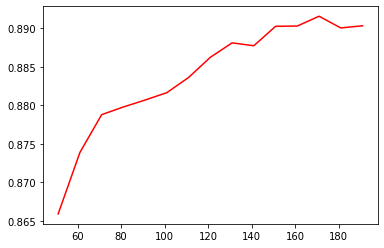

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
score_lt = []

# 每隔10步建立一个随机森林，获得不同n_estimators的得分
for i in range(50,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=42)
    score = cross_val_score(rfc, PCA_Data, all_labels.astype(int), cv=10,scoring='roc_auc').mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(51,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

### sklearn.metrics.roc_auc_score()的使用方法

`sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)`

* 参数说明

+ y_true：真实的标签。形状(n_samples，)或(n_samples, n_classes)。二分类的形状(n_samples，1)，而多标签情况的形状(n_samples, n_classes)。

+ y_score：目标分数。形状(n_samples，)或(n_samples, n_classes)。二分类情况形状(n_samples，1)，“分数必须是具有较大标签的类的分数”，通俗点理解:模型打分的第二列。举个例子:模型输入的得分是一个数组[0.98361117 0.01638886]，索引是其类别，这里“较大标签类的分数”，指的是索引为1的分数：0.01638886，也就是正例的预测得分。

average='macro'：二分类时，该参数可以忽略。用于多分类，
' micro '：将标签指标矩阵的每个元素看作一个标签，计算全局的指标。
' macro '：计算每个标签的指标，并找到它们的未加权平均值。这并没有考虑标签的不平衡。
'weighted '：计算每个标签的指标，并找到它们的平均值，根据支持度(每个标签的真实实例的数量)进行加权。

+ sample_weight=None：样本权重。形状(n_samples，)，默认=无。

+ max_fpr=None：

+ multi_class='raise'：

+ labels=None：

* 输出：

+ auc：是一个float的值。

In [257]:
from sklearn.ensemble import RandomForestClassifier     #随机森林
def RFC2(trainData,trainLabels, testData,testLabels,paramdict):
    
    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)#二值化
    #paramdict={'n_estimators':63, 'max_depth':5,'criterion':'entropy','class_weight':'balanced','random_state':42}
    rfc = RandomForestClassifier(n_estimators=paramdict['n_estimators'], 
                                 max_features=paramdict['max_features'],
                                 min_samples_split=paramdict['min_samples_split'],
                                 min_samples_leaf=paramdict['min_samples_leaf'], 
                                 min_weight_fraction_leaf=paramdict['min_weight_fraction_leaf'],
                                 criterion=paramdict['criterion'],
                                 class_weight='balanced',random_state=paramdict['random_state']) 
    #rfc = RandomForestClassifier(n_estimators=63, max_depth=5,criterion='entropy',class_weight='balanced',random_state=42)
    start = time()
    rfc = rfc.fit(trainData, trainLabels)                 #用训练集数据训练模型
    end = time()
    elapsed = end - start
    print("Time to train model RF: %.9f seconds" % elapsed)
    pred = rfc.predict(testData)
    result = rfc.score(testData, testLabels)
    proba = rfc.predict_proba(testData)[:,1]
    rocauc = roc_auc_score(testLabels, proba)
    recall = recall_score(testLabels, pred)
    precision = precision_score(testLabels, pred)
    print(resultAnalysis(testData,testLabels,pred,proba,))
    
    return pred
#GS.fit(PCA_projected_trainData, train_labels)
#print(GS.best_params_)
#print(GS.best_score_)

parameters={'n_estimators':63, 'max_depth':20,'max_features':26,'min_samples_split':14, 'min_samples_leaf':3,'min_weight_fraction_leaf':0.00,
            'criterion':'entropy','class_weight':'balanced','random_state':42}
RFC2(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels,parameters)

Time to train model RF: 0.496448278 seconds
Accuracy     0.949
Precision    0.735
Recall       0.735
F1_score     0.735
AUC          0.925
AUPRC        0.566
Name: non-avg, dtype: object
[[307   9]
 [  9  25]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       316
           1       0.74      0.74      0.74        34

    accuracy                           0.95       350
   macro avg       0.85      0.85      0.85       350
weighted avg       0.95      0.95      0.95       350



array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [273]:
import xgboost as xgb
from time import *

#def load_csv(path):
#    df = pd.read_csv(path)
#    target = df['cls']
#    df = df.drop(['cls'], axis=1)
#    return xgb.DMatrix(df.values, label=target.values)

#dtest = load_csv('/hdd/hdd1/twonormData/t1000.csv')
#xgb.DMatrix(PCA_projected_trainData, label=train_labels.astype(int))
def evaluate(trainData,trainLabels, testData,testLabels, num_trees=100,max_depth=50,num_jobs=-1):
    trainLabels=trainLabels.astype(int)
    testLabels=testLabels.astype(int)
    dtrain = xgb.DMatrix(trainData, label=trainLabels)
    dtest = xgb.DMatrix(testData, label=testLabels)
    param = {'num_parallel_tree':num_trees, 'max_depth':max_depth, 'objective':'binary:logistic',
        'nthread':num_jobs, 'subsample':0.7,'scale_pos_weight':9}
    start = time()
    model = xgb.train(param, dtrain, 1)
    # 性能评估以XGboost为例
    #xgb = xgb.XGBClassifier()
    # 对训练集训练模型
    #xgb.fit(trainData,trainLabels)
    # 对测试集进行预测
    #y_pred = xgb.predict(testData)
    end = time()
    elapsed = end - start
    print("Time to train XGBoost model: %.9f seconds" % elapsed)
    prediction = model.predict(dtest)
    #proba = model.predict_proba(testData)[:,1]
    #print(prediction.shape)
    length=len(prediction)
    proba = np.stack([[1-a for a in prediction],prediction],axis=-1)
    pred=[]
    for i in range(len(prediction)):
        if prediction[i] >0.5:
            pred.append(1)
        else:pred.append(0)
    
    #print(pred)
    #print("Accuracy = %.3f" % np.mean(prediction == dtest.get_label()))
    print(resultAnalysis(testData,testLabels,pred,prediction))

evaluate(PCA_projected_trainData,train_labels, PCA_projected_testData,test_labels,)    #choose your own parameter

Time to train XGBoost model: 1.617673635 seconds
Accuracy      0.92
Precision    0.571
Recall       0.706
F1_score     0.632
AUC          0.917
AUPRC        0.432
Name: non-avg, dtype: object
[[298  18]
 [ 10  24]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       316
           1       0.57      0.71      0.63        34

    accuracy                           0.92       350
   macro avg       0.77      0.82      0.79       350
weighted avg       0.93      0.92      0.92       350



调参是一个非常重要的步骤，可以帮助我们优化机器学习算法的表现。对于sklearn随机森林算法，调参需要注意以下几点：

n_estimators：随机森林中树的数量。增加这个参数可以提高算法的表现，但同时会使得算法的计算时间变长。因此，需要根据具体情况进行调整。

max_depth：树的最大深度。增加这个参数可以提高算法的表现，但同时也会使得算法的计算时间变长。需要注意的是，如果max_depth设置太大，会导致过拟合的问题。

min_samples_split：节点进行分裂所需的最小样本数量。增加这个参数可以防止过拟合，但会使得算法的表现变差。

min_samples_leaf：叶节点所需的最小样本数量。增加这个参数可以防止过拟合，但会使得算法的表现变差。

max_features：特征随机选择的个数。增加这个参数可以提高算法的表现，但也会增加算法的计算时间。

bootstrap：是否有放回地进行采样。如果设置为False，会使得随机森林变成极端随机森林。

criterion：衡量分裂质量的准则。一般选择“gini”或“entropy”。

## Grid Search-网格搜索
调参的过程可以使用网格搜索(Grid Search)或随机搜索(Random Search)等方法进行。可以通过如下代码进行调参：

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

# 设置要调整的参数
parameters = {'n_estimators': [10, 50, 100],
              'max_depth': [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2],
              'max_features': [2, 4],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# 使用网格搜索进行调参
grid_search = GridSearchCV(clf, parameters, cv=3, n_jobs=1, verbose=1)
grid_search.fit(X, y)

# 输出最佳的参数组合和得分
print(grid_search.best_params_)
print(grid_search.best_score_)
```
在网格搜索的过程中，我们首先创建了一个空的随机森林分类器，然后设置了要调整的参数。我们还设置了交叉验证的次数(cv)和并行处理的数量(n_jobs)。然后我们使用GridSearchCV函数进行网格搜索，并使用了verbose参数指定详细程度。最后输出最佳的参数组合和得分。

## 贝叶斯优化
scikit-learn里的内置贝叶斯优化库为BayesSearchCV，该库可以在超参数空间中使用朴素贝叶斯优化算法，以尝试找到最佳超参数组合。BayesSearchCV需要设定要优化的超参数的搜索范围和目标指标，并为算法提供模型评估器。

下面是一个简单的随机森林模型的贝叶斯优化调参示例代码：

```python
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# 定义随机森林模型并设定超参数空间
rf = RandomForestClassifier(n_estimators=100, random_state=0)
param_dist = {'max_depth': Integer(10, 50),
              'min_samples_split': Integer(2, 10),
              'min_samples_leaf': Integer(1, 10),
              'max_features': Real(0.1, 1.0)}

# 使用交叉验证来对模型进行评估
def objective_func(params):
    rf.set_params(**params)
    return -np.mean(cross_val_score(rf, X, y, cv=5, scoring='f1'))

# 在超参数空间上运用贝叶斯搜索来优化模型
opt = BayesSearchCV(rf,
                    param_dist,
                    n_iter=25,
                    scoring='f1',
                    cv=5,
                    random_state=0)
opt.fit(X, y)
```
在上面的代码中，使用了sklearn的内置贝叶斯优化库BayesSearchCV。首先定义了一个随机森林模型并设定了超参数空间，然后使用交叉验证评估模型的表现，并将评估结果作为目标函数。最后，在超参数空间上使用BayesSearchCV进行参数搜索，搜索结束后可以使用如下代码来输出参数搜索的结果：

```python
print("Best F1 Score:3f" opt.best_score_)
print("Best Parameters:s" str(opt.best_params_))
```
使用BayesSearchCV时，可以通过参数n_iter来控制贝叶斯优化的迭代次数，通常n_iter要比随机搜索大，这样可以更好地探索超参数空间。同时，参数cv指定了用于交叉验证的数据集的拆分数量，一般默认为5。scoring参数用于指定评估指标，这里选择了F1得分，因为它同时考虑了准确率和召回率，是一个比较全面的指标。

需要注意的是，由于贝叶斯优化是一种基于概率的优化方法，因此它的寻优速度可能会受到几个因素的影响，例如超参数的数量和范围、目标函数的复杂性等。因此，在进行调参时，需要根据实际情况和计算资源情况进行适当的调整和控制。

In [192]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from functools import partial
from skopt import BayesSearchCV
from skopt.space import Real, Integer

X=PCA_projected_trainData
y=train_labels.astype(int)

# 定义随机森林模型并设定超参数空间
rf = RandomForestClassifier(random_state=42)
param_dist = {'max_depth': Integer(1, 20),
              'n_estimators': Integer(100, 250),
              'min_samples_split': Integer(2, 10),
              'min_samples_leaf': Integer(1, 10),
              'min_weight_fraction_leaf': Real(0, 0.5),
              'criterion': ['gini', 'entropy'],
              }

# 使用交叉验证来对模型进行评估
def objective_func(params):
    rf.set_params(**params)
    return -np.mean(cross_val_score(rf, X, y, cv=10, scoring='f1'))

# 在超参数空间上运用贝叶斯搜索来优化模型
opt = BayesSearchCV(rf,
                    param_dist,
                    n_iter=35,
                    scoring='recall',
                    cv=10,
                    random_state=42)
opt.fit(X, y)
print("Best F1 Score:%3f" % opt.best_score_)
print("Best Parameters:%s" % str(opt.best_params_))

Best F1 Score:0.303571
Best Parameters:OrderedDict([('criterion', 'gini'), ('max_depth', 18), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 227)])


In [79]:
param_grid = {'max_depth':np.arange(1,20,1),'min_samples_split':np.arange(2, 2+20, 1)} 
#param_grid ={'max_features':np.arange(5,30,1),'min_samples_leaf':np.arange(1, 1+10, 1),'min_samples_split':np.arange(2, 2+20, 1),'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=120,oob_score=True,class_weight='balanced',criterion='gini',random_state=42) 
GS = GridSearchCV(rfc,param_grid,cv=10,scoring='roc_auc') 
GS.fit(PCA_Data,all_labels.astype(int))
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 5, 'min_samples_split': 9}
0.9163436078484622


In [105]:
!pip install scikit-optimize

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ------------------------------------ 100.3/100.3 kB 240.1 kB/s eta 0:00:00


In [159]:
from functools import partial
[i for i in range(50,200,10)]
step = 10
variable = Integer(low=50, high=200, prior='uniform')

# Discretize the variable into step bins
variable = np.linspace(variable.low,variable.high,step).astype(int)
print(variable)

[ 50  66  83 100 116 133 150 166 183 200]


In [247]:
!pip install pip install dolphindb

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 4.3/4.3 MB 2.1 MB/s eta 0:00:00
